# Análise de dados exploratória

O mercado automotivo representa uma parcela considerável do PIB brasileiro, correspondendo a cerca de 22% dele, segundo o Ministério da Economia. Esse setor tem apresentado um crescimento constante e há indícios de que o consumo possa aumentar em 2023, devido a medidas anunciadas que reduzem impostos sobre veículos populares.

O cenário parece promissor, tornando este um momento propício para analisar o desempenho do mercado nos últimos anos.

---


Esta é uma Análise de Dados Exploratória que irá responder às perguntas levantadas pelo cliente e também formular hipóteses sobre o mercado de compra e venda de seminovos no Brasil.

**O script se divide em:**



1.   Pré-processamento
2.   Análise de dados univariados
3. Análise de dados multivariados
4. Perguntas do cliente
5. Considerações finais



In [ ]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")


# 1. Pré-processamento

Aqui são realizados ajustes iniciais no conjunto de dados para compreendermos as informações com as quais iremos trabalhar.

In [ ]:
# Lendo o arquivo

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Lighthouse 2/cars_train.csv', encoding='utf-16', sep = "\t", on_bad_lines='skip')

In [ ]:
# Retirando coluna que não será útil na análise

df = df.drop(columns='id')

In [ ]:
# Verificando a presença de dados nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29407 non-null  float64
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  float64
 6   hodometro                29584 non-null  float64
 7   cambio                   29584 non-null  object 
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  object 
 10  blindado                 29584 non-null  object 
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null  object 
 13  cidade_vendedor          29584 non-null  object 
 14  estado_vendedor       

Algumas variáveis apresentam uma quantidade significativa de dados ausentes, no entanto, essas ausências indicam a falta de uma característica específica para essa variável, e não exatamente um valor nulo.

A coluna 'veiculo_alienado' foi removida do conjunto de dados, pois todos os valores contidos nessa coluna são nulos.


In [ ]:
# Verificando a porcentagem de nulos

nan_df = {'percentage':df.isnull().sum() * 100 / len(df)}
nan_percentage = pd.DataFrame(data=nan_df)
nan_percentage.sort_values(by='percentage', ascending=False).head(10)

,percentage
veiculo_alienado,100.000000
garantia_de_fábrica,85.245403
revisoes_dentro_agenda,80.022985
revisoes_concessionaria,68.996755
veiculo_único_dono,64.768118
veiculo_licenciado,46.234451
ipva_pago,33.548540
dono_aceita_troca,25.899135
num_fotos,0.598296
marca,0.000000


In [ ]:
# Retirada da coluna

df = df.drop(columns=['veiculo_alienado'])

# 2. Análise de dados univariados

Na estatística, os dados podem ser divididos em univariados e multivariados. Os dados univariados representam apenas uma variável do conjunto de dados, ou seja, uma coluna. Nesta análise exploratória, iremos examinar as características individualmente, uma de cada vez.

Para representar os dados, a maioria das variáveis será visualizada por meio de gráficos de barras, pois a maioria delas é composta por dados categóricos. Os gráficos de barras são uma abordagem adequada para visualizar esse tipo de informação.

A maior parte das compras é realizada com vendedores que são pessoas físicas. No entanto, no caso em questão, o cliente é uma pessoa jurídica. Portanto, é importante observar que existem vantagens e desvantagens para o consumidor ao comprar de cada tipo de vendedor. Neste momento, estamos apenas examinando as proporções de vendas. Posteriormente, exploraremos oportunidades adicionais para destacar vendedores pessoa jurídica.

In [ ]:
# Quantidade normalizada de tipos de anunciantes

anunciante_sorted = {'normalized':df['anunciante'].value_counts(normalize=True)}
df_anunciante = pd.DataFrame(data=anunciante_sorted).reset_index(names='type')
df_anunciante

,type,normalized
0,Pessoa Física,0.608403
1,Loja,0.333931
2,Concessionária,0.057531
3,Acessórios e serviços para autos,0.000135


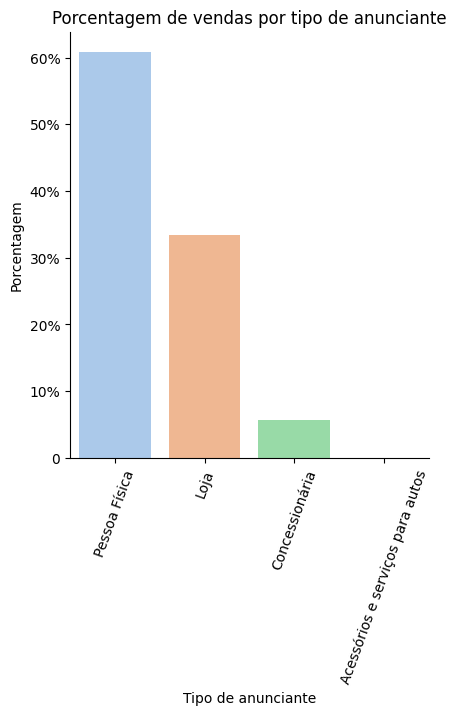

In [ ]:
# Gráfico anunciantes x porcentagem

sns.set_palette(sns.color_palette('pastel'))
sns.catplot(data=df_anunciante, x='type', y='normalized', kind='bar')
plt.title('Porcentagem de vendas por tipo de anunciante')
plt.ylabel('Porcentagem')
plt.xlabel('Tipo de anunciante')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], ['0', '10%', '20%', '30%', '40%', '50%', '60%'])
plt.xticks(rotation=70)
plt.show()

No gráfico a seguir, podemos observar que as regiões Sul e Sudeste são as que registram o maior número de vendas neste conjunto de dados. Essa distribuição geográfica nos leva a focar nossa análise nessas regiões, pois a ocorrência em outros estados pode ser mínima em algumas das análises subsequentes.

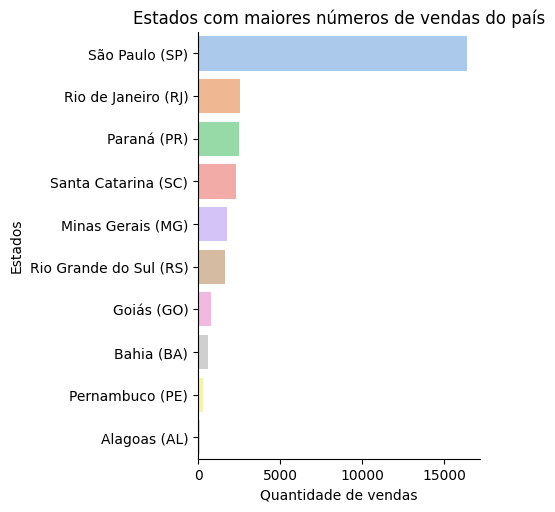

In [ ]:
# Gráfico de estados que mais vendem

states_df = pd.DataFrame(df['estado_vendedor'].value_counts())
states_iloc = states_df.iloc[:10].reset_index(names='estados')
sns.set_palette(sns.color_palette('pastel'))
sns.catplot(data=states_iloc, y='estados', x='estado_vendedor', orient='h', kind='bar')
plt.title('Estados com maiores números de vendas do país')
plt.ylabel('Estados')
plt.xlabel('Quantidade de vendas')
plt.show()

Aqui, podemos observar que os carros mais recentes, a partir de 2017, são os mais vendidos. Isso indica um comportamento do consumidor que pode ser explorado pelo cliente por meio de campanhas de marketing ou anúncios direcionados a esse segmento de mercado.

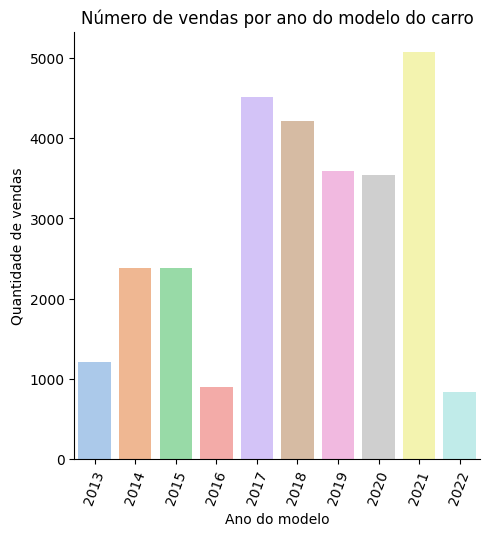

In [ ]:
# Seleção de colunas

ano_df = pd.DataFrame({'count':df['ano_modelo'].value_counts()}).reset_index(names='year')
ano_df['year'] = ano_df['year'].astype('int64')
ano_df_iloc = ano_df.iloc[:10]

# Gráfico modelo do carro x número de vendas

sns.set_palette(sns.color_palette('pastel'))
sns.catplot(data=ano_df_iloc, x='year', y='count', kind='bar')
plt.title('Número de vendas por ano do modelo do carro')
plt.ylabel('Quantidade de vendas')
plt.xlabel('Ano do modelo')
plt.xticks(rotation=70)
plt.show()

As marcas de carros mais vendidas são as populares. Isso sugere uma tendência em relação à preferência do cliente em direcionar sua postura em relação ao público consumidor. Essa informação pode ser relevante para o cliente ao considerar estratégias de marketing e posicionamento de sua marca no mercado automotivo.

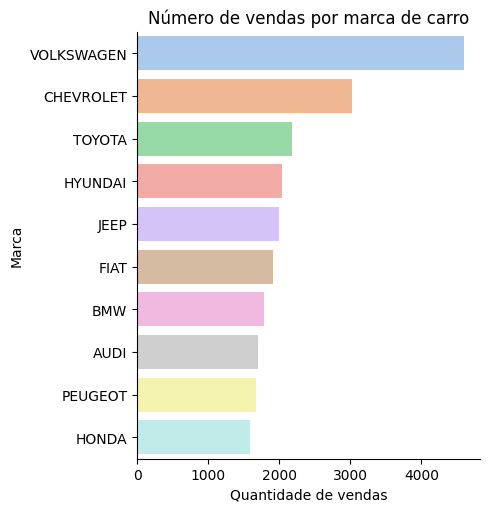

In [ ]:
# Criando dataframe de marcas mais vendidas

marca_df = pd.DataFrame({'count':df['marca'].value_counts().sort_values(ascending=False)}).reset_index(names='brand').iloc[:10]

# Gráfico de marcas mais vendidadas

sns.set_palette(sns.color_palette('pastel'))
sns.catplot(data=marca_df, y='brand', x='count', orient='h', kind='bar')
plt.title('Número de vendas por marca de carro')
plt.ylabel('Marca')
plt.xlabel('Quantidade de vendas')
plt.show()

Entre os consumidores de carros, a demanda por veículos com câmbio automático tem aumentado constantemente. No gráfico abaixo, podemos observar que a maioria dos carros vendidos atende a esse requisito. Portanto, uma sugestão para o cliente é que ele dê preferência a veículos com câmbio automático, pois eles têm uma maior aceitação no mercado. No entanto, também é importante aprofundar a análise dos veículos com outros tipos de câmbio para entender melhor suas particularidades e atender às necessidades de um público específico.

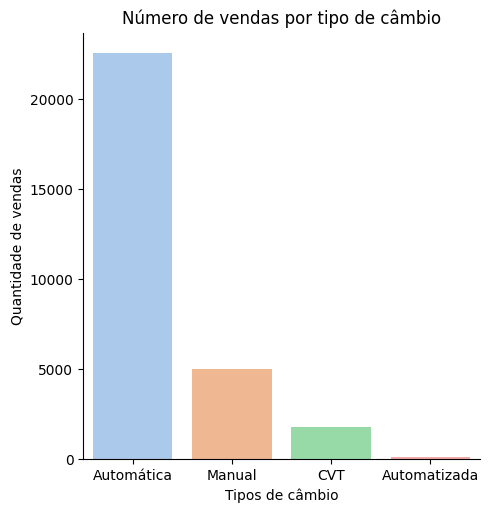

In [ ]:
# Dafaframe filtrado por tipo de câmbio

cambio_df = df['cambio'].value_counts(ascending=False).reset_index(name='cambio_tipo').iloc[:4]

# Gráfico de quantidade de vendas por tipo de câmbio

sns.set_palette(sns.color_palette('pastel'))
sns.catplot(data=cambio_df, x='index', y='cambio_tipo', kind='bar')
plt.title('Número de vendas por tipo de câmbio')
plt.ylabel('Quantidade de vendas')
plt.xlabel('Tipos de câmbio')
plt.show()

# 3. Dados multivariados

Nesta etapa da análise, utilizaremos as features como dados multivariados, que se referem a informações representadas por duas ou mais variáveis, ou seja, duas ou mais colunas. Realizaremos o cruzamento de informações entre essas variáveis para obter insights sobre as relações e interações entre elas.

## 3.1 Hipóteses Sugeridas

Levantamos aqui algumas hipóteses iniciais que parecem pertinentes ao pedido do cliente e seus objetivos. São feitas três sugestões que podem ser melhor lapidadas conforme ocorrerem reuniões e à medida que mais informações forem trazidas à equipe.


Hipótese 1: O pagamento do IPVA e a entrega via delivery são vantagens competitivas no mercado?

A primeira hipótese levantada nesta análise refere-se aos vendedores de carros. As vendas foram divididas entre pessoas físicas e jurídicas, uma vez que observamos anteriormente que há pouca diversidade entre os vendedores do tipo jurídico.

Vamos considerar, inicialmente, uma vantagem competitiva que os vendedores pessoa jurídica possuem em relação aos vendedores pessoa física. Podemos sugerir que a questão burocrática seja um fator que desestimula as compras por parte das pessoas físicas. Para chegarmos a uma conclusão, é necessário analisar os dados disponíveis.


In [ ]:
# Transformação do tipo da coluna de string

df['ipva_pago'] = df['ipva_pago'].astype('str')
df['entrega_delivery'] = df['entrega_delivery'].astype('str')

No gráfico abaixo, observamos que a maioria dos carros comprados com o IPVA pago são vendidos por pessoas físicas, representando cerca de 80% das vendas. Encontramos aproximadamente 20% desses carros sendo vendidos por pessoas jurídicas. Por outro lado, os carros sem o IPVA pago representam cerca de 30% das vendas por pessoas físicas e 20% por pessoas jurídicas.

Isso nos indica que, pelo menos em relação ao IPVA, não há uma vantagem clara para os vendedores jurídicos, uma vez que as pessoas físicas já realizam o pagamento do IPVA antes da venda. No entanto, mesmo com esse cenário, uma pessoa jurídica que oferece o IPVA pago para seus clientes pode ter uma vantagem em relação a outras empresas, uma vez que o número de carros vendidos sem o IPVA pago é proporcionalmente elevado.


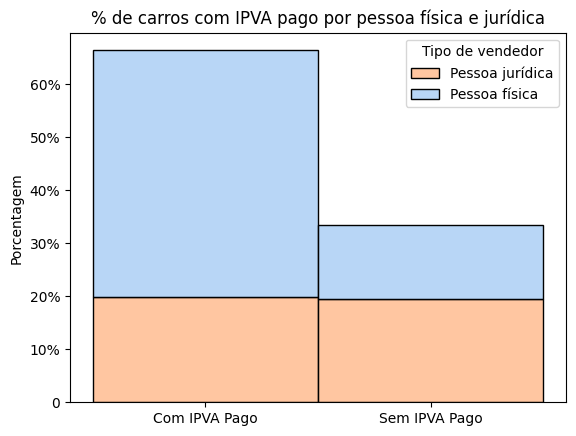

In [ ]:
sns.set_palette(sns.color_palette('pastel'))
sns.histplot(data=df, x='ipva_pago', hue='tipo_vendedor', stat='percent', multiple='stack')
plt.title('% de carros com IPVA pago por pessoa física e jurídica')
plt.yticks([0, 10, 20, 30, 40, 50, 60], ['0', '10%', '20%', '30%', '40%', '50%', '60%'])
plt.xticks(['IPVA pago', 'nan'], ['Com IPVA Pago', 'Sem IPVA Pago'])
plt.xlabel('')
plt.ylabel('Porcentagem')
plt.legend(title='Tipo de vendedor', labels=[ 'Pessoa jurídica', 'Pessoa física'])
plt.show()

Aqui, temos um fator relevante que confere vantagens ao vendedor pessoa jurídica: **a realização de entrega via delivery**.

Realizar viagens para fora do próprio estado ou cidade para comprar um carro pode ser desgastante para o consumidor. Portanto, oferecer o serviço de entrega do carro até o cliente é um benefício praticamente inexistente entre os vendedores pessoa física. Mesmo entre as próprias empresas, a proporção daquelas que oferecem esse serviço é igual à proporção das que não oferecem, o que indica a existência de um mercado em potencial.

Com isso, é possível que a empresa amplie seu mercado de atuação e se conecte com o público que valoriza serviços que oferecem mais praticidade no dia a dia. Esse serviço pode ser ofertado principalmente nas regiões Sul e Sudeste, onde se concentram as vendas de carros, facilitando a implementação desse benefício.

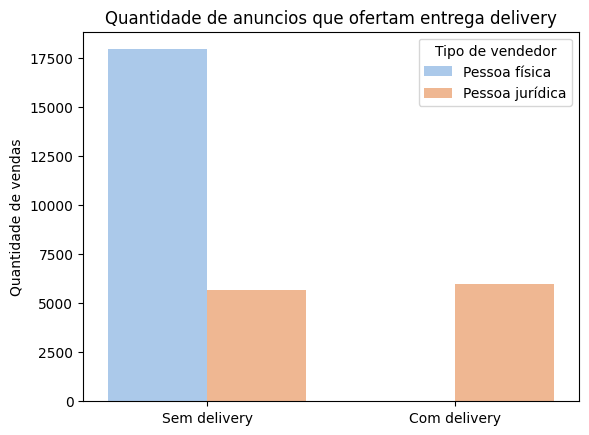

In [ ]:
sns.set_palette(sns.color_palette('pastel'))
sns.countplot(data=df, x='entrega_delivery', hue='tipo_vendedor')
plt.title('Quantidade de anuncios que ofertam entrega delivery')
plt.xlabel('')
plt.xticks([False, True], ['Sem delivery', 'Com delivery'])
plt.ylabel('Quantidade de vendas')
plt.legend(title='Tipo de vendedor', labels=['Pessoa física', 'Pessoa jurídica'])
plt.show()

**Hipótese 2**: Existe alguma marca específica que mereça destaque?

Ao comprar um carro, os consumidores geralmente procuram informações sobre a marca e o modelo, buscam opiniões de especialistas na internet, programas de televisão e revistas especializadas. Com base nisso, podemos investigar quais são as marcas e modelos mais vendidos nos principais estados presentes em nossa base de dados. Poderemos comparar essas informações com os veículos disponíveis no catálogo de vendas do cliente, buscando identificar marcas que mereçam destaque e que possam atrair um maior número de compradores.

In [ ]:
# Filtragem do dataframe

estado_grouped = df.groupby(by='estado_vendedor')['marca','versao'].value_counts()
estado_grouped_versao = estado_grouped.groupby(level=[0]).nlargest(5)

In [ ]:
# Separação entre os estados com mais vendas

estado_df = pd.DataFrame({'count':estado_grouped_versao})
estado_df_index = estado_df.reset_index(level=(1, 2, 3))
estados = ['São Paulo (SP)', 'Rio de Janeiro (RJ)', 'Paraná (PR)', 'Santa Catarina (SC)', 'Minas Gerais (MG)']
estado_df_index = estado_df_index.rename(columns={'estado_vendedor':'estado'})
estados_five = estado_df_index.loc[estados]


Abaixo, apresentamos os três veículos mais vendidos nos cinco estados mais representados em nosso conjunto de dados.

In [ ]:
# Filtragem de estados

lista = [0, 1, 3, 5, 6, 7, 10, 11, 12, 15, 16, 17, 20, 21, 22]
estados_carros = estados_five.iloc[lista]
estados_carros

,estado,marca,versao,count
estado_vendedor,,,,
São Paulo (SP),São Paulo (SP),PEUGEOT,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,651
São Paulo (SP),São Paulo (SP),JEEP,2.0 16V FLEX LIMITED AUTOMÁTICO,567
São Paulo (SP),São Paulo (SP),FIAT,1.8 16V EVO FLEX FREEDOM AT6,235
Rio de Janeiro (RJ),Rio de Janeiro (RJ),JEEP,2.0 16V FLEX LIMITED AUTOMÁTICO,82
Rio de Janeiro (RJ),Rio de Janeiro (RJ),PEUGEOT,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,75
Rio de Janeiro (RJ),Rio de Janeiro (RJ),AUDI,2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,52
Paraná (PR),Paraná (PR),PEUGEOT,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,150
Paraná (PR),Paraná (PR),JEEP,2.0 16V FLEX LIMITED AUTOMÁTICO,91
Paraná (PR),Paraná (PR),VOLKSWAGEN,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,61


Diante desses dados, podemos observar que as marcas que mais se destacam em vendas são Peugeot e Jeep. Ambas possuem modelos populares e são amplamente reconhecidas no país.


In [ ]:
# Contagem de marcas

estados_carros['marca'].value_counts()

PEUGEOT       5
JEEP          5
AUDI          2
VOLKSWAGEN    2
FIAT          1
Name: marca, dtype: int64

Dessa forma, observamos que as marcas Peugeot e Jeep, com veículos automáticos e versões flex, são as mais vendidas em nosso conjunto de dados. Com base nessas informações, podemos compreender o perfil de compra do consumidor. Esses insights auxiliam na elaboração de planos de marketing e estratégias para atrair clientes interessados tanto nos veículos mais vendidos quanto nos menos vendidos.

Uma sugestão para análises futuras é cruzar as informações disponíveis neste conjunto de dados com uma análise do comportamento do consumidor nas redes sociais, especialmente com relação aos influenciadores do setor automobilístico. Isso pode contribuir para atingir os clientes que estão seguindo as tendências do mercado, permitindo uma abordagem mais eficaz com modelos e marcas em alta popularidade.

In [ ]:
# Contagem de modelos

estados_carros['versao'].value_counts()

1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO                            5
2.0 16V FLEX LIMITED AUTOMÁTICO                                   5
2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC                    2
1.8 16V EVO FLEX FREEDOM AT6                                      1
2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO    1
1.0 200 TSI COMFORTLINE AUTOMÁTICO                                1
Name: versao, dtype: int64

**Hipótese 3**: O ano de fabricação e o tipo de carro influenciam a compra?

É sabido que os motoristas e as motoristas possuem preferências de carros, que vão desde questões técnicas a estilo na pilotagem. Acima, já vimos que a marca é um fator padronizado para a compra de um carro pelos clientes, pois as marcas Peugeout e Jeep se repetem no topo. Agora, vamos analisar se o ano de fabricação do modelo e o tipo de carro possuem alguma correlação.

Será que podemos encontrar mais um padrão nesse dataset que ajude a tomada de decisão do cliente?

In [ ]:
# Filtragem do dataset

tipo_carro = df.groupby(by='tipo')['ano_de_fabricacao', 'cambio'].value_counts(ascending=False)
tipo_carro_df = pd.DataFrame(tipo_carro)
tipo_carro_df_index = tipo_carro_df.reset_index()

Os modelos do tipo Sedã apresentam uma quantidade expressiva de vendas em comparação com outros modelos, seguidos por Hatch e picape. Isso nos indica mais um indício de um padrão de comportamento do consumidor.

A hipótese de que o ano de fabricação e o tipo do carro influenciam a decisão de compra parece plausível diante desses dados. Portanto, o cliente pode considerar ofertar em maior escala carros do tipo Sedã e Hatch para seu público-alvo.

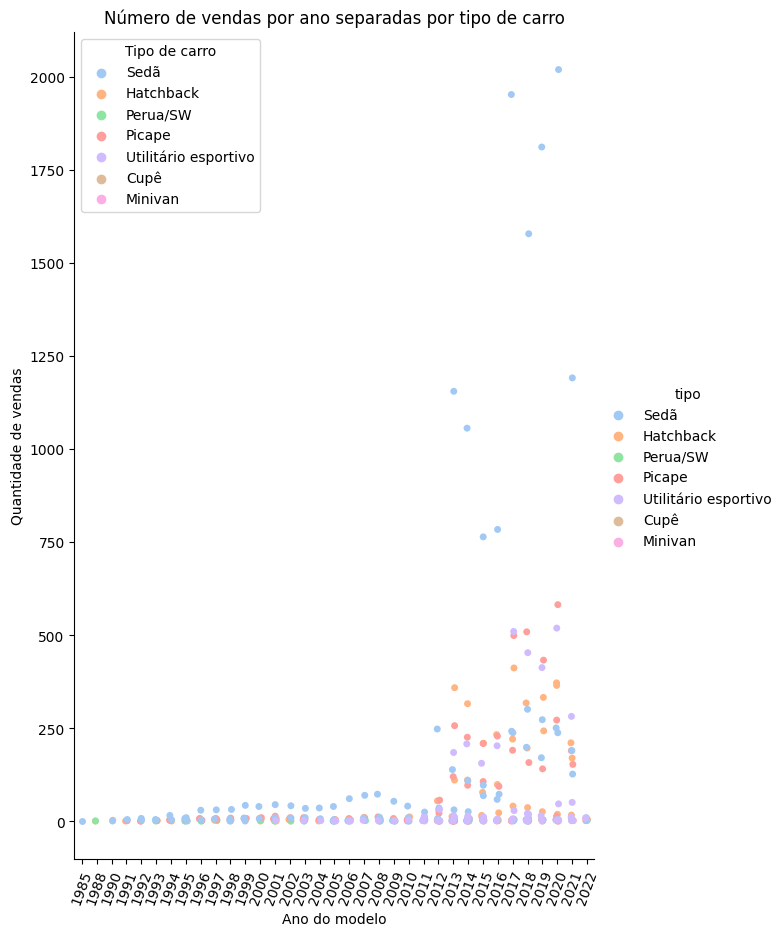

In [ ]:
# Gráfico

sns.catplot(data=tipo_carro_df_index, x='ano_de_fabricacao', y=0, hue='tipo', height=9, aspect=0.7)
plt.title('Número de vendas por ano separadas por tipo de carro')
plt.ylabel('Quantidade de vendas')
plt.xlabel('Ano do modelo')
plt.legend(title='Tipo de carro')
plt.xticks(rotation=70)
plt.show()

# 4. Perguntas do cliente

Aqui, responderemos às perguntas feitas pelo cliente utilizando tanto as features quanto a variável target para esta etapa da análise.

## 4.1. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Para responder a essa pergunta, é necessário primeiro identificar as marcas de carros populares presentes em nosso conjunto de dados e analisar a faixa de preço desses veículos anunciados.

In [ ]:
# Separação de carros populares

df_popular = df[(df['marca'] == 'VOLKSWAGEN') |
                (df['marca'] == 'CHEVROLET') |
                (df['marca'] == 'TOYOTA') |
                (df['marca'] == 'HYUNDAI') |
                (df['marca'] == 'JEEP') |
                (df['marca'] == 'FIAT') |
                (df['marca'] == 'PEUGEOT') |
                (df['marca'] == 'HONDA') |
                (df['marca'] == 'FORD') |
                (df['marca'] == 'RENAULT') |
                (df['marca'] == 'NISSAN') |
                (df['marca'] == 'CITROËN')]



Aqui, percebemos que há um número elevado de carros com valores acima do que seria considerado para um carro popular, incluindo outliers, como dois veículos com valores em torno de 780 mil reais. A presença desses outliers pode distorcer nossa análise de forma incorreta. Portanto, para mitigar esse efeito, vamos considerar apenas os valores abaixo de 300 mil reais, removendo assim todos os outliers.

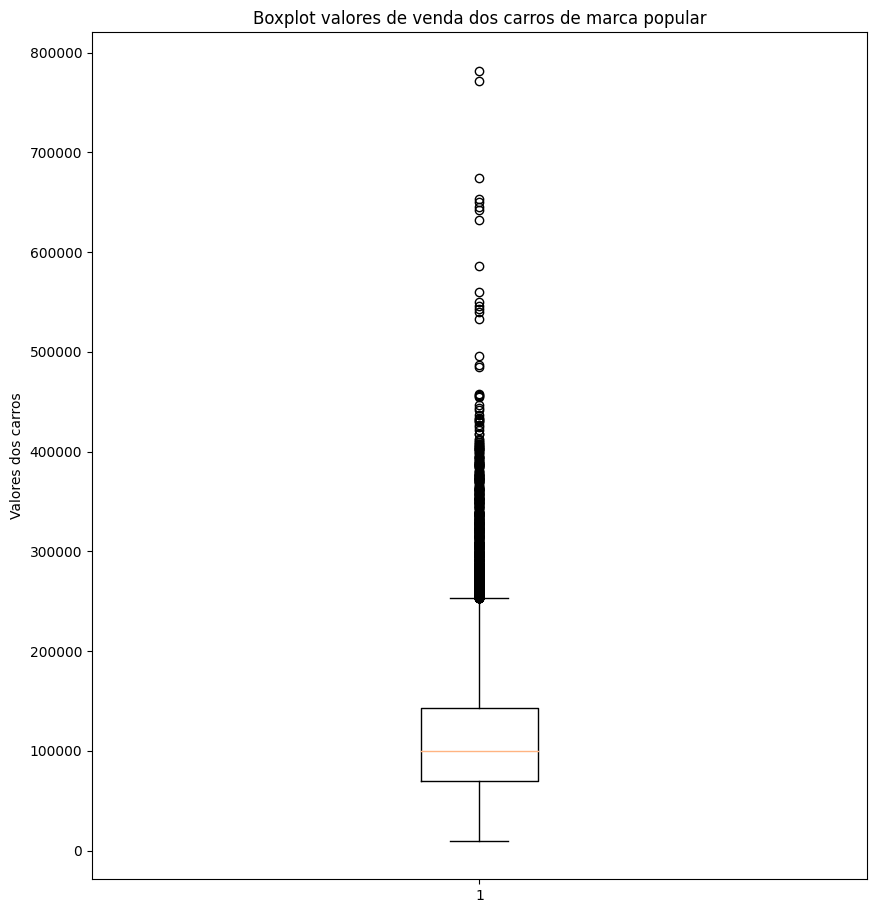

In [ ]:
# Construção do gráfico

plt.figure(figsize=(10,11))
plt.boxplot(df_popular['preco'])
plt.title('Boxplot valores de venda dos carros de marca popular')
plt.ylabel('Valores dos carros')
plt.xlabel('')
plt.show()

Agora iremos separar nosso dataframe considerando apenas os estados que têm uma quantidade significativa de vendas de carros em nossa amostra. Isso é importante para garantir que tenhamos uma estimativa estatisticamente significativa, pois trabalhar com números muito pequenos, como é o caso de alguns estados, pode resultar em conclusões menos confiáveis.

In [ ]:
# Filtragem por estado

df_popular_estados = df_popular[(df_popular['estado_vendedor'] == 'São Paulo (SP)') |
                                (df_popular['estado_vendedor'] == 'Rio de Janeiro (RJ)') |
                                (df_popular['estado_vendedor'] == 'Paraná (PR)') |
                                (df_popular['estado_vendedor'] == 'Santa Catarina (SC)') |
                                (df_popular['estado_vendedor'] == 'Minas Gerais (MG)') |
                                (df_popular['estado_vendedor'] == 'Rio Grande do Sul (RS)') |
                                (df_popular['estado_vendedor'] == 'Goiás (GO)')]

In [ ]:
# Separação de carros abaixo de 300000

df_popular_outlier = df_popular_estados[df_popular['preco'] < 300000]

Vamos agrupar os carros por estado e calcular a média de preço dos veículos em cada um deles.

In [ ]:
# Agrupamento por estado e média

estado_mean = df_popular_outlier.groupby(by='estado_vendedor')['preco'].mean().astype('int').reset_index().sort_values(by='preco', ascending=False)
estado_mean_df = pd.DataFrame(estado_mean)

Para responder à pergunta do cliente, utilizamos dois critérios: o estado com uma alta demanda de carros (ou seja, os que mais vendem) e a análise do preço médio dos veículos nesses estados.

Considerando que estamos tratando da venda de carros, é interessante que o valor médio de venda seja alto para que o lucro seja maior. Portanto, entre os estados que mais vendem carros, o estado de Goiás apresentou o maior valor médio de venda, com R$127.476.

In [ ]:
# Média por estado

pd.set_option('display.max_rows', 30)
estado_mean_df

,estado_vendedor,preco
0,Goiás (GO),127476
2,Paraná (PR),119426
3,Rio Grande do Sul (RS),117753
1,Minas Gerais (MG),113852
4,Rio de Janeiro (RJ),111775
5,Santa Catarina (SC),111159
6,São Paulo (SP),105782


É importante também analisarmos a mediana dos estados para entendermos se a média é representativa da amostra que estamos utilizando. Observamos que o valor da mediana se aproxima da média, indicando uma distribuição relativamente simétrica dos preços dos carros nos estados analisados.

In [ ]:
# Agrupamento por estado e mediana

estado_median = df_popular_outlier.groupby(by='estado_vendedor')['preco'].median().astype('int').reset_index().sort_values(by='preco', ascending=False)
estado_median_df = pd.DataFrame(estado_median)
estado_median_df

,estado_vendedor,preco
0,Goiás (GO),122041
2,Paraná (PR),110653
3,Rio Grande do Sul (RS),108251
1,Minas Gerais (MG),105045
4,Rio de Janeiro (RJ),99864
5,Santa Catarina (SC),99365
6,São Paulo (SP),95190


## 4.2. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

Essa pergunta será respondida utilizando uma metodologia semelhante à da pergunta anterior. Iremos considerar as melhores condições de compra de uma picape em termos de preço e ano de fabricação, além de identificar o modelo mais vendido nessa categoria. Com base nesses critérios, encontraremos o estado que melhor atende a esses requisitos.

Vamos separar o dataframe filtrando apenas as picapes que possuem câmbio automático, uma vez que já identificamos que esse tipo de câmbio é o mais vendido em nosso conjunto de dados e, portanto, pode ser indicado como de maior preferência dos consumidores.

In [ ]:
# Filtragem do dataframe

picape = df[(df['tipo'] == 'Picape') & (df['cambio'] == 'Automática')]

In [ ]:
# Agrupamento das variáveis utilizadas

picape_estados = pd.DataFrame(picape.groupby(by=['estado_vendedor', 'marca', 'ano_de_fabricacao', 'modelo', 'versao'])['preco'].mean().astype('int').sort_values(ascending=False)).reset_index()

Podemos observar que os estados que mais vendem automóveis também se repetem nessa amostragem de picapes com câmbio automático.

In [ ]:
# Contagem de estados presentes na amostra

picape_estados['estado_vendedor'].value_counts()

São Paulo (SP)              449
Paraná (PR)                 187
Santa Catarina (SC)         157
Rio de Janeiro (RJ)         153
Minas Gerais (MG)           121
Rio Grande do Sul (RS)      118
Goiás (GO)                   69
Bahia (BA)                   54
Pernambuco (PE)              13
Alagoas (AL)                  9
Mato Grosso (MT)              6
Sergipe (SE)                  5
Acre (AC)                     5
Mato Grosso do Sul (MS)       5
Paraíba (PB)                  4
Tocantins (TO)                3
Piauí (PI)                    3
Rio Grande do Norte (RN)      1
Name: estado_vendedor, dtype: int64

In [ ]:
# Conversão da coluna 'preco' para int

picape_estados['preco'] = picape_estados['preco'].astype('int64')

No gráfico abaixo, podemos visualizar os percentis de cada estado, fornecendo uma estimativa visual da média de preços das picapes. É perceptível que Santa Catarina e São Paulo possuem outliers, enquanto em alguns estados do Nordeste e Norte do Brasil, os valores das picapes estão acima dos demais estados.



<Figure size 2000x900 with 0 Axes>

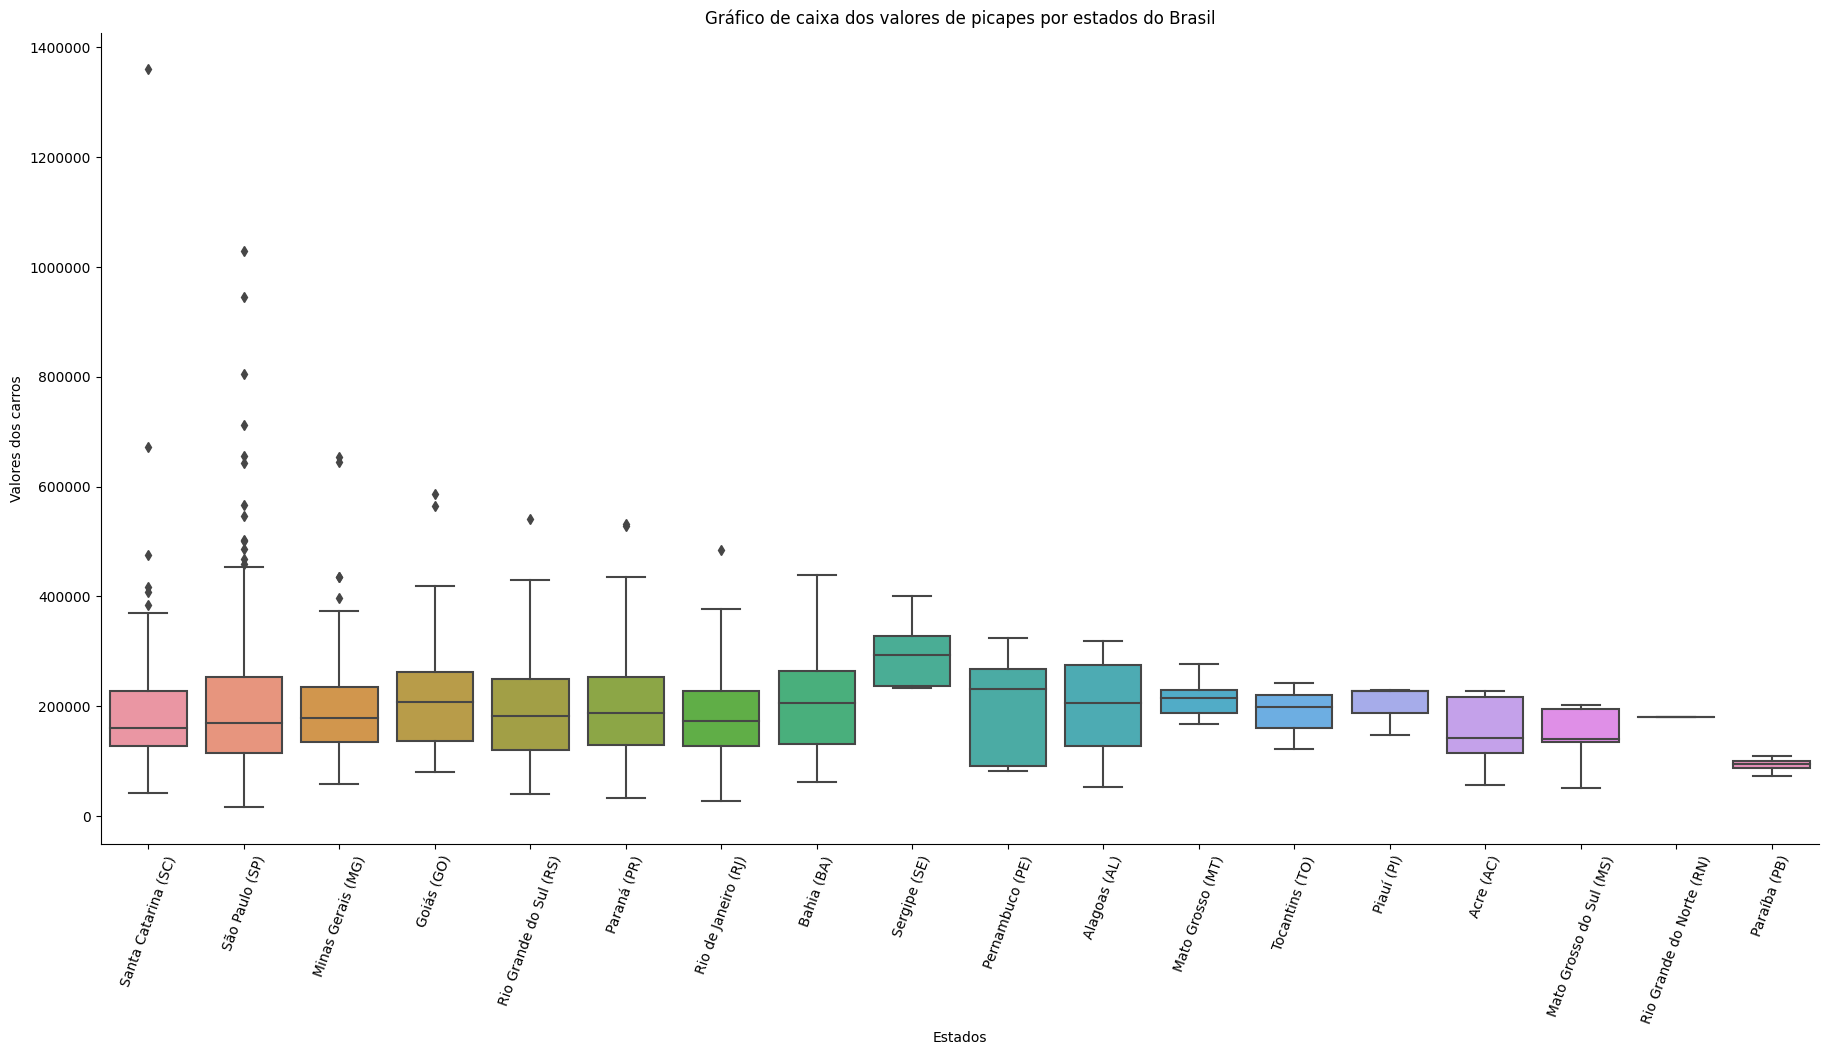

In [ ]:
# Gráfico de caixa

plt.figure(figsize=(20,9))
sns.set_palette(sns.color_palette('pastel'))
sns.catplot(data=picape_estados, x='estado_vendedor', y='preco', kind="box", height=9, aspect=2)
plt.title('Gráfico de caixa dos valores de picapes por estados do Brasil')
plt.ylabel('Valores dos carros')
plt.xlabel('Estados')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=70)
plt.show()

In [ ]:
# Preço medio de picapes

print(f'Preço médio de picapes de todos os estados da amostra: R${picape_estados.preco.mean():.2f}')

Preço médio de picapes de todos os estados da amostra: R$195151.05


Aqui, seguimos com a seleção de picapes novas (ano de fabricação acima de 2018) com valor próximo ou abaixo da média da amostra de todos os estados. Esses critérios foram considerados para escolher uma picape em boas condições e com um preço competitivo.

Além disso, foi selecionado o modelo Toro de picape, que é um dos mais vendidos e recomendados no mercado. Com base nesses critérios, o estado do **Rio de Janeiro** foi identificado como o melhor estado onde o modelo Toro atende aos nossos requisitos.

Observação: Alguns estados podem aparecer acima do Rio de Janeiro na lista com médias menores, mas eles possuem uma presença pouco significativa em nossa amostra, o que limita nossa capacidade de fazer estimativas mais precisas.

In [ ]:
# Filtragem do dataframe

picape_220 = picape_estados[(picape_estados['ano_de_fabricacao'] > 2018) & (picape_estados['preco'] < 220000)]
picape_toro = picape_220[picape_220['modelo'] == 'TORO']
picape_toro.groupby(by='estado_vendedor')['preco'].mean().sort_values(ascending=True)

estado_vendedor
Pernambuco (PE)              83683.500000
Paraíba (PB)                103810.500000
Alagoas (AL)                122524.000000
Bahia (BA)                  125573.142857
Rio de Janeiro (RJ)         143353.187500
Paraná (PR)                 146079.000000
Rio Grande do Sul (RS)      146796.214286
Santa Catarina (SC)         147836.823529
Piauí (PI)                  147846.000000
São Paulo (SP)              148967.681818
Goiás (GO)                  152069.500000
Minas Gerais (MG)           153535.545455
Mato Grosso (MT)            167591.000000
Rio Grande do Norte (RN)    179961.000000
Name: preco, dtype: float64

## 4.3. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

Para responder a essa pergunta, consideraremos os carros que apresentem a melhor média de preço e as melhores condições em relação às revisões, pois essas características são relevantes para um motorista que busca um carro com garantia de fábrica. Portanto, o estado em que houver um maior número de carros que atendam a essas condições será considerado o melhor para a compra de um carro com garantia de fábrica.

In [ ]:
# Separação de variáveis pertinentes para a análise

garantia_df = df[['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'revisoes_concessionaria', 'preco']]

In [ ]:
# Seleção de critérios

garantia_condicoes = garantia_df[(garantia_df['garantia_de_fábrica'] == 'Garantia de fábrica') &
                                 (garantia_df['revisoes_dentro_agenda'] == 'Todas as revisões feitas pela agenda do carro') &
                                 (garantia_df['revisoes_concessionaria'] == 'Todas as revisões feitas pela concessionária')]

Podemos observar a repetição dos estados das regiões Sul e Sudeste como os mais representativos na amostra. Para fins de análise, consideraremos apenas os estados que possuem um número de carros à venda acima de 100 unidades. Dessa forma, teremos um conjunto de estados mais significativos para avaliar a disponibilidade de carros com garantia de fábrica.

In [ ]:
# Quantidade de carros por estado

garantia_condicoes['estado_vendedor'].value_counts()

São Paulo (SP)              1292
Paraná (PR)                  201
Rio de Janeiro (RJ)          198
Santa Catarina (SC)          191
Rio Grande do Sul (RS)       160
Minas Gerais (MG)            139
Goiás (GO)                    81
Bahia (BA)                    33
Pernambuco (PE)               19
Alagoas (AL)                  16
Pará (PA)                      9
Rio Grande do Norte (RN)       9
Amazonas (AM)                  7
Espírito Santo (ES)            7
Mato Grosso do Sul (MS)        2
Tocantins (TO)                 1
Mato Grosso (MT)               1
Acre (AC)                      1
Name: estado_vendedor, dtype: int64

In [ ]:
# Média geral do valor das picapes de todos os estados

print(f'Valor médio da picape considerando todos os estados da amostra: R${garantia_condicoes.preco.mean():.2f}')

Valor médio da picape considerando todos os estados da amostra: R$166176.34


Dentro dos critérios selecionados, o estado que melhor atendeu aos requisitos foi Minas Gerais.

In [ ]:
grantia_estados = garantia_condicoes.groupby(by='estado_vendedor')['preco'].mean().sort_values()
grantia_estados

estado_vendedor
Amazonas (AM)                97359.999184
Espírito Santo (ES)         104013.508248
Pará (PA)                   105726.074841
Mato Grosso do Sul (MS)     118556.258157
Rio Grande do Norte (RN)    133120.393894
Alagoas (AL)                138326.673167
Pernambuco (PE)             149101.208376
Minas Gerais (MG)           160404.961786
Goiás (GO)                  160848.394701
São Paulo (SP)              164634.904570
Paraná (PR)                 167683.718980
Rio de Janeiro (RJ)         173805.776037
Santa Catarina (SC)         175476.393473
Rio Grande do Sul (RS)      176546.679382
Mato Grosso (MT)            178934.006888
Bahia (BA)                  179764.124559
Acre (AC)                   228022.077115
Tocantins (TO)              243002.217032
Name: preco, dtype: float64

# 5. Considerações finais

Com base na análise realizada neste dataset, observamos que as compras e vendas de automóveis estão concentradas nas regiões Sul e Sudeste do Brasil, sendo São Paulo o principal polo. Identificamos uma preferência por carros automáticos e modelos a partir do ano de 2018. Além disso, as marcas Peugeot e Jeep se destacaram como as mais vendidas.

Durante esta análise, foram feitas algumas sugestões de possíveis estratégias para a empresa. No entanto, é importante ressaltar que esta é uma análise preliminar e que demanda uma investigação mais aprofundada para validar as hipóteses levantadas. Recomendamos a realização de pesquisas utilizando outras fontes para obter maior embasamento sobre o mercado automobilístico. Além disso, é possível realizar o cruzamento de informações com outros bancos de dados e realizar análises de tendências nas redes sociais, de acordo com o perfil de consumidor do cliente.

Também é importante destacar que este conjunto de dados se concentra nas regiões Sul e Sudeste, o que limita a inferência de hipóteses para outros estados do país. É fundamental alinhar com o cliente suas intenções de atuação, considerando se essas regiões são de interesse para sua empresa, uma vez que os números aqui apresentados representam apenas uma parte da população do país, tendo em vista que o Brasil é um país continental.